# Exercice: Cytomégalovirus humain en Ouganda (et intro à pandas)

> Ceci est un exemple de README.ipynb, un notebook que je vous conseille de créer dès que vous 
> recevez un nouveau jeu de données. Le but est de centraliser au même endroit: 
>   - Une notice de la provenance et du contenu des données, comment les récupérer à nouveaux
>   - Une visualisation rapide du contenu (descriptive seulement, vous pouvez prendre des notes en markdown), ici 
>     j'ai juste fait des commentaires sur pandas.
>   - Une vérification de la cohérence des données
>   - Quelques transformations préalables à l'analyse
>   - Bien séparer ce qui vous arrive (dans `raw/`) et ce qui va servir à vos analyses après vérification/corrections (dans `processed/`)


Le Cytomégalovirus humain, (HCMV) ou *Human Herpesvirus 5* est un virus de la famille des herpès virus très fréquent dans la population humaine. Voici un jeu de donnée permettant de caractériser l'interaction du HCMV avec d'autres infections transmissibles comme le VIH, la tuberculose et des facteurs de risques cardiovasculaires.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Origine des données

Les données dans raw ont été fournies par Guillaume Louvel lors du cours de statistique le 2x novembre 2018. 

Ces données sont issues de l'article:

> Stockdale, Lisa, Stephen Nash, Angela Nalwoga, Hannah Painter, Gershim Asiki, Helen Fletcher, and Robert Newton. “Human Cytomegalovirus Epidemiology and Relationship to Tuberculosis and Cardiovascular Disease Risk Factors in a Rural Ugandan Cohort.” PloS One 13, no. 2 (2018): e0192086. [Lien vers PlosOne](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0192086)

Le jeu de donnée original peut être récupéré sur dryad:
> Stockdale, Lisa, Stephen Nash, Angela Nalwoga, Hannah Painter, Gershim Asiki, Helen Fletcher, and Robert Newton. “Data from: Human Cytomegalovirus Epidemiology and Relationship to Tuberculosis and Cardiovascular Disease Risk Factors in a Rural Ugandan Cohort,” February 6, 2018. https://doi.org/10.5061/dryad.d1k17. [Lien vers Dryad](https://datadryad.org/resource/doi:10.5061/dryad.d1k17)

In [ ]:
%%bash 
# On peut mettre un script bash dans un notebook !

# Créer l'arborescence 
mkdir -p data/raw

# Récupérer les données depuis le dossier du projet.
cp /users/mag/tpinfo/projet_HCMV.csv data/raw/

# Récupérer les données depuis la source 
wget https://datadryad.org/bitstream/handle/10255/dryad.170089/RAW_DATA.xls?sequence=1 -O data/raw/RAW_DATA.xls

In [2]:
# On peut aussi faire une seule commande bash dans le notebook avec le préfixe "!".
!head data/raw/projet_HCMV.csv

"sex";"cmv";"age";"cmvstatus";"hiv";"TB";"m_syst";"m_diast";"R22_bpgroup";"BMI";"bmi";"cholesterol";"high_d_lipid";"low_d_lipid";"hba1c";"cmv_tertile"
"Male";0,7485;0;"positive";"negative";"negative";;;"";;"";;;;;"Low"
"Male";0,6335;0;"positive";"negative";"negative";;;"";;"";;;;;"Low"
"Female";0,379;0;"positive";"negative";"negative";;;"";;"";;;;;"Low"
"Female";0,8295;0;"positive";"negative";"negative";;;"";;"";;;;;"Low"
"Female";0,517;0;"positive";"negative";"negative";;;"";;"";;;;;"Low"
"Male";1,0365;0;"positive";"positive";"negative";;;"";;"";;;;;"Medium"
"Male";1,017;0;"positive";"negative";"negative";;;"";;"";;;;;"Medium"
"Female";0,3305;0;"positive";"negative";"negative";;;"";;"";;;;;"Low"
"Female";0,139;0;"negative";"positive";"negative";;;"";;"";;;;;"Negative"


## Notice des variables

|**Nom** | **Description** |
|-
|`sex`| Sexe des individus ('Male', 'Female')|
|`cmv`| Dosage d'anticorps au HCMV |
|`age`| Age en année 
| `cmvstatus` | Séropositivité au CMV ('positive', 'negative') |
| `hiv` | Séropositivié au HIV
| `TB` | Résultat du test salivaire à la tuberculose |
|`m_syst`| Durée moyenne de systole 
| `m_diast`| Durée moyenne de diastole 
| `R22_bpgroup`| Hypertension 
| `BMI` | Indice de masse corporelle (IMC)
| `cholesterol`| Taux sanguin de cholesterol
| `high_d_lipid`| Taux sanguin de HDL
| `low_d_lipid` | Taux sanguin de LDL
| `hba1c` | Taux d'hémoglobine glyquée 
| `cmv_tertile` | Catégorisation en 3 quantiles de cmv

# Lecture

In [7]:
# Ouvrir le fichier
data = pd.read_csv('data/raw/projet_HCMV.csv', sep=';', decimal=',') #=> Un objet de type pd.DataFrame
data = pd.read_excel('data/raw/RAW_DATA.xls')
print("Tableau de donnée de taille: {} lignes, {} colonnes ".format(*data.shape))
data.head()

Tableau de donnée de taille: 2174 lignes, 15 colonnes 


,sex,cmv,age_yrs,cmvstatus,hiv,mean_syst,mean_diast,R22_bpgroup,BMI,bmi,cholesterol,high_d_lipid,hba1c,low_d_lipid,cmv_tertile
0,Male,0.7485,0.0833333,positive,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
1,Male,0.6335,0.0833333,positive,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
2,Female,0.3790,0.166667,positive,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
3,Female,0.8295,0.166667,positive,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
4,Female,0.5170,0.166667,positive,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low


In [8]:
# On peut boucler sur les noms de colonnes avec:
for col in data.columns:
    print("- {} ({})".format(col,data[col].dtype), end='') # col.dtype donne le type de la colonne. 
    n = data[col].nunique() # nunique compte le nombre de valeurs uniques dans la colonne, .unique() liste ces valeurs
    print(' {} unique values {}'.format(n, ': '+str(data[col].unique()) if n <= 4 else ''))

- sex (object) 2 unique values : ['Male' 'Female']
- cmv (float64) 1610 unique values 
- age_yrs (object) 662 unique values 
- cmvstatus (object) 2 unique values : ['positive' 'negative']
- hiv (object) 3 unique values : ['negative' 'positive' 'unknown']
- mean_syst (object) 168 unique values 
- mean_diast (object) 117 unique values 
- R22_bpgroup (object) 4 unique values : [nan 'Normal' 'Pre-hypertension' 'Hypertension stage 1'
 'Hypertension stage 2']
- BMI (float64) 1025 unique values 
- bmi (object) 4 unique values : [nan 'Normal weight' 'Underweight' 'Overweight' 'Obese']
- cholesterol (float64) 430 unique values 
- high_d_lipid (float64) 273 unique values 
- hba1c (float64) 354 unique values 
- low_d_lipid (float64) 399 unique values 
- cmv_tertile (object) 4 unique values : ['Low' 'Medium' 'Negative' 'High']


In [9]:
# pandas utilise un type nommé catégorie pour les données qualitatives (comme les factors de R)
# pd. read stocke les entrées des csv comme des chaines de caractère (dtype=object par défaut)
# mais on peut les convertir en catégorie avec:
for col in ['sex', 'hiv', 'cmvstatus', 'cmv_tertile']:
    data[col] = data[col].astype('category')

In [10]:
# On peut accéder au np.array sous-jacent de chaque colonne.
data.cmv.values #=> np.array

array([0.7485, 0.6335, 0.379 , ..., 0.07  , 2.043 , 1.807 ])

In [11]:
#On peut filtrer grace au "Boolean indexing", comme pour les np.array.
data[data.cmv>2.5]

,sex,cmv,age_yrs,cmvstatus,hiv,mean_syst,mean_diast,R22_bpgroup,BMI,bmi,cholesterol,high_d_lipid,hba1c,low_d_lipid,cmv_tertile
706,Female,2.5065,7.58333,positive,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1603,Male,2.5440,34.3333,positive,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1641,Female,2.8390,35.6667,positive,positive,101,64.5,Normal,19.023912,Normal weight,3.28,1.29,4.05,1.54,High
1788,Female,2.7655,43.75,positive,negative,110.5,71,Normal,22.818537,Normal weight,5.12,0.79,NaN,2.24,High


In [12]:
# On remarque que les colonnes arge_yrs, mean_syst et mean_diast qui devaient être float
# sont de type object. 

# La colonne "age" contient des valeurs qui ne sont pas des nombres...
# On le voit en faisant data['age_yrs'].unique()
print(frozenset([type(x) for x in data['age_yrs']]))
data['age_yrs'].unique()

frozenset({<class 'str'>, <class 'int'>, <class 'float'>})


array([0.0833333358168602, 0.1666666716337204, 0.25, 0.3333333432674408,
       0.4166666567325592, 0.5, 0.5833333134651184, 0.6666666865348816,
       0.75, 0.8333333134651184, 0.9166666865348816, 1,
       1.0833333730697632, 1.1666666269302368, 1.25, 1.3333333730697632,
       1.4166666269302368, 1.5, 1.5833333730697632, 1.6666666269302368,
       1.75, 1.8333333730697632, 1.9166666269302368, 2,
       2.0833332538604736, 2.1666667461395264, 2.25, 2.3333332538604736,
       2.4166667461395264, 2.5, 2.5833332538604736, 2.6666667461395264,
       2.75, 2.8333332538604736, 2.9166667461395264, 3,
       3.0833332538604736, 3.1666667461395264, 3.25, 3.3333332538604736,
       3.4166667461395264, 3.5, 3.5833332538604736, 3.6666667461395264,
       3.75, 3.8333332538604736, 3.9166667461395264, 4, 4.083333492279053,
       4.166666507720947, 4.25, 4.333333492279053, 4.416666507720947, 4.5,
       4.583333492279053, 4.666666507720947, 4.75, 4.833333492279053,
       4.916666507720947, 5, 5.0

In [13]:
# On peut le corriger comme ceci 
# On créer une colonne age, numérique cette fois ci. # (on fixe tout 80+ à 80)
# Ajouter une colonne se fait simplement en assignant un itérable de la bonne longueur.
data['age'] = [a if a!='80+' else 80 for a in data.age_yrs]

In [14]:
# Les colonnes mean_diast et mean_syst contient un "don't know"
data[data.mean_diast=="Don't know"]

,sex,cmv,age_yrs,cmvstatus,hiv,mean_syst,mean_diast,R22_bpgroup,BMI,bmi,cholesterol,high_d_lipid,hba1c,low_d_lipid,cmv_tertile,age
1333,Female,1.291,22.9167,positive,negative,Don't know,Don't know,Hypertension stage 2,21.784439,Normal weight,3.51,1.1,3.6,1.92,High,22.916666


In [17]:
# Correction avec une compréhension de liste:
for d in ('diast','syst'):
    data['m_'+d]= [float(m) if m!="Don't know" else np.nan for m in data['mean_'+d]]

In [18]:
# La méthode describe donne le nombre de valeur non nulles, 
# la moyenne, l'écart type et les pourcentiles des variables quantitatives
data.describe()

,cmv,BMI,cholesterol,high_d_lipid,hba1c,low_d_lipid,age,m_diast,m_syst
count,2174.000000,1150.000000,1186.000000,1186.000000,1176.000000,1186.000000,2174.000000,1186.000000,1186.000000
mean,1.038379,21.036491,3.492056,0.972934,3.273901,1.983557,22.614921,74.098229,122.779089
std,0.461336,3.502296,0.966336,0.438494,0.675460,0.770839,20.575627,10.294270,17.502998
min,-0.003000,12.798847,1.020000,0.030000,0.770000,0.019503,0.083333,46.000000,82.500000
25%,0.803125,18.898643,2.820000,0.700000,2.900000,1.470000,5.187500,67.500000,111.500000
50%,1.019000,20.654502,3.400000,0.940000,3.290000,1.930000,16.250000,72.500000,120.000000
75%,1.304375,22.631470,4.070000,1.200000,3.650000,2.430000,35.166668,80.000000,130.000000
max,2.839000,55.900074,7.670000,4.160000,11.350000,5.290000,80.000000,125.500000,213.000000


In [19]:
# On remarque que le jeu de donnée contient une ligne où cmv est négatif 
# (alors que les auteurs ont dit que ce n'était pas le cas)
data[data.cmv<0]

,sex,cmv,age_yrs,cmvstatus,hiv,mean_syst,mean_diast,R22_bpgroup,BMI,bmi,cholesterol,high_d_lipid,hba1c,low_d_lipid,cmv_tertile,age,m_diast,m_syst
145,Female,-0.003,1.5,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,1.5,NaN,NaN


In [20]:
# On le corrige avec un indexage booléen
# Le .copy assure qu'on est entrain de travailler sur une copie et pas une vue de raw.
data = data[data.cmv>0]

data.shape

(2173, 18)

Female    1090
Male      1083
Name: sex, dtype: int64
---
negative    2033
positive     100
unknown       40
Name: hiv, dtype: int64
---
positive    1988
negative     185
Name: cmvstatus, dtype: int64
---
Medium      663
Low         663
High        662
Negative    185
Name: cmv_tertile, dtype: int64
---


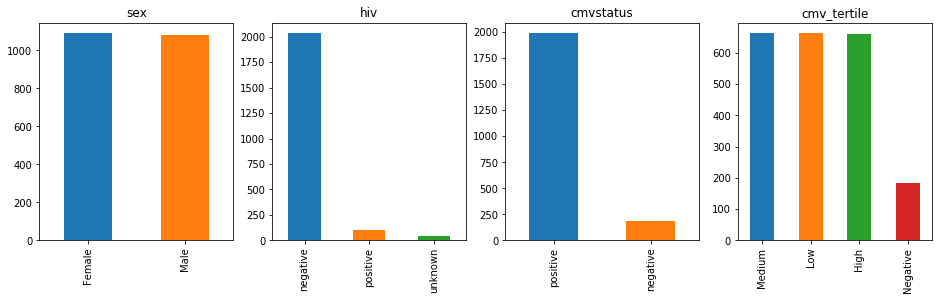

In [21]:
cols = ['sex', 'hiv', 'cmvstatus', 'cmv_tertile']
fig, axes = plt.subplots(1,len(cols), figsize=(len(cols)*4,4))
# notez l'utilisation de zip pour pouvoir boucler sur les éléments de cols et de axes à la fois. 
for ax,col in zip(axes, cols):
    df = pd.value_counts(data[col]) #=> pd.DataFrame
    print(df, end='\n---\n')
    # Les dataframes ont des méthodes de plot qui appellent matplotlib.
    # https://pandas.pydata.org/pandas-docs/stable/visualization.html#
    df.plot.bar(ax=ax) #=> On peut préciser sur quel ax dessiner. 
    ax.set(title=col)

In [24]:
import scipy.stats

/home/guilhem/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


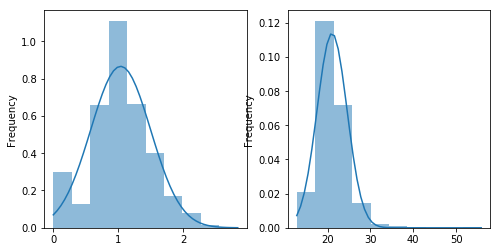

In [23]:
cols = ['cmv','BMI']
fig, axes = plt.subplots(1,len(cols), figsize=(len(cols)*4,4))
for col,ax in zip(cols,axes):
    X = scipy.stats.norm(loc=data[col].mean(), scale=data[col].std())
    x = np.linspace(data[col].min(), data[col].max())
    ax.plot(x, X.pdf(x))
    data[col].plot.hist(ax=ax, normed=True, alpha=0.5, color='C0')

In [25]:
# L'itérateur retourné par groupby permet de séparer le jeu de donnée à partir de la valeur 
# d'une colonne. 
for sex, df in data[['sex','cmv']].groupby('sex'):
    # sex contient la valeur de data.sex (Male/Female)
    # df contient un dataframe correspondant à la valeur.
    print("=== "+sex+' ===')
    print(df.describe())
    
# L'objet groupby lui même à des méthodes pratiques qui combinent le résultat en un dataframe:
data.groupby('sex').mean() #sum...

=== Female ===
               cmv
count  1090.000000
mean      1.068265
std       0.480569
min       0.023500
25%       0.813125
50%       1.044750
75%       1.358875
max       2.839000
=== Male ===
               cmv
count  1083.000000
mean      1.009262
std       0.438453
min       0.003500
25%       0.790500
50%       0.995500
75%       1.242250
max       2.544000


,cmv,BMI,cholesterol,high_d_lipid,hba1c,low_d_lipid,age,m_diast,m_syst
sex,,,,,,,,,
Female,1.068265,21.735216,3.707957,1.005221,3.291037,2.155617,22.244500,74.285240,120.977612
Male,1.009262,20.340193,3.267994,0.939426,3.255990,1.804994,23.007233,73.904803,124.642367


In [26]:
# On peut groupby une liste de colonnes:
data.groupby(['sex','cmvstatus']).mean()

cmv        BMI  cholesterol  high_d_lipid     hba1c  \
sex    cmvstatus                                                             
Female negative   0.131954  22.416178     4.094572      1.062917  3.413618   
       positive   1.159728  21.688296     3.681270      1.001238  3.282530   
Male   negative   0.108437  20.849242     3.139676      0.871625  3.165429   
       positive   1.088933  20.312223     3.275213      0.943241  3.261150   

                  low_d_lipid        age    m_diast      m_syst  
sex    cmvstatus                                                 
Female negative      2.476045  15.337629  75.538462  119.115385  
       positive      2.133499  22.919189  74.198582  121.106383  
Male   negative      1.712627  13.694129  72.596774  122.580645  
       positive      1.810191  23.830905  73.978261  124.758152

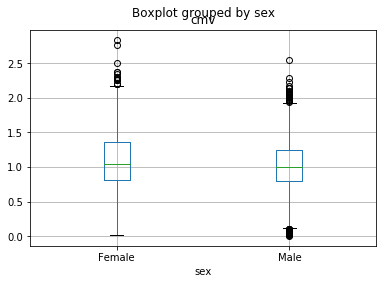

In [27]:
# La méthode boxplot peut prendre un argument groupby.
data.boxplot(column='cmv',by='sex');

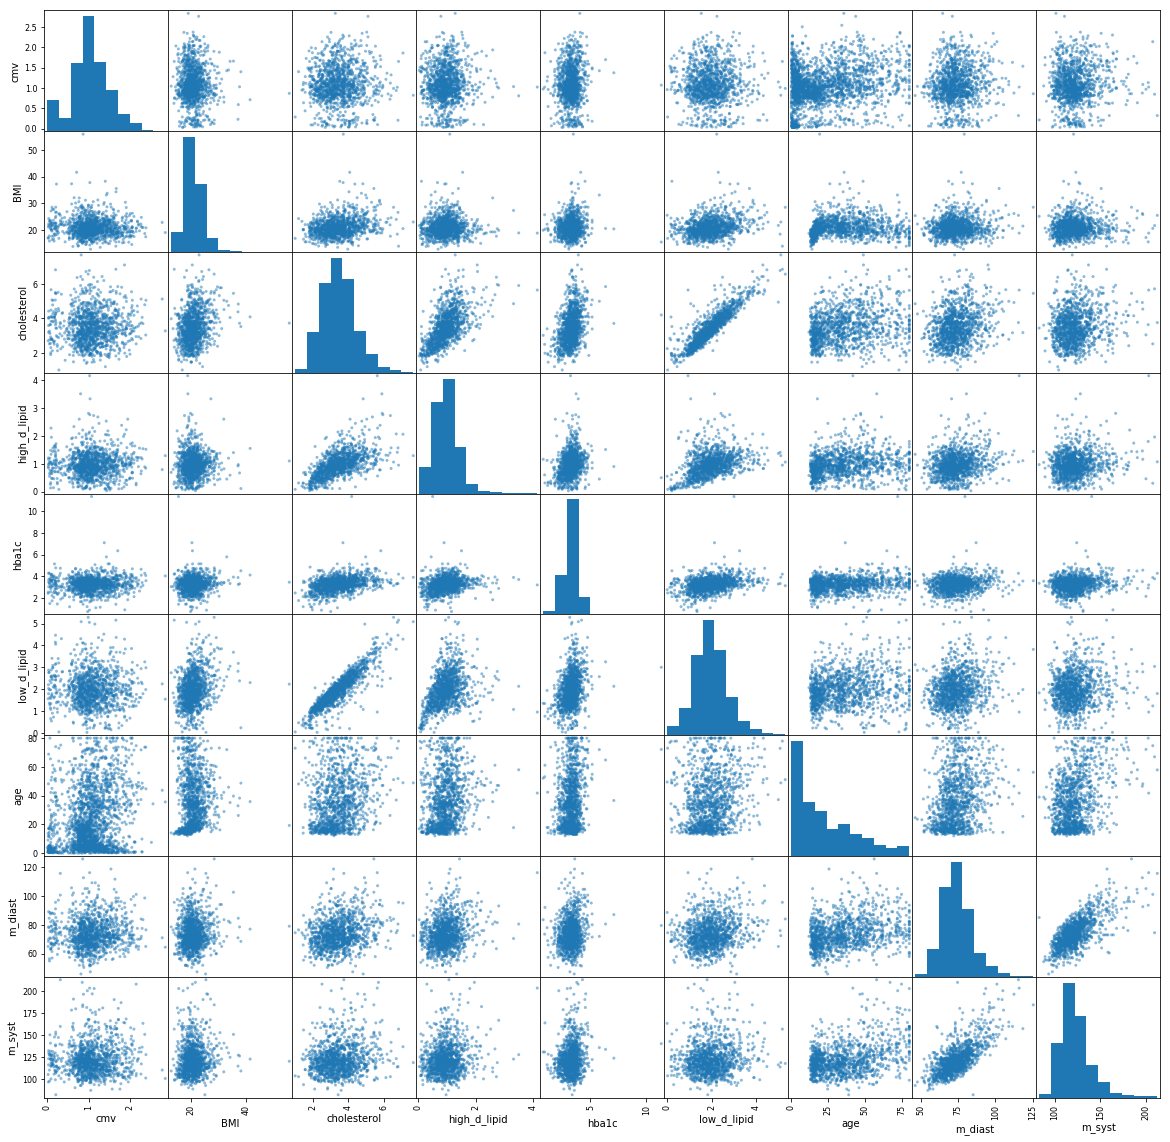

In [28]:
# Scatter matrix permet d'afficher toutes les paires de variables quantitatives.
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,20));

# Test de cohérence (sanity check)

In [29]:
# On peut conserver seulement certaines colonnes
data = data[['sex', 'cmv', 'age', 'cmvstatus', 'hiv', 'm_diast', 'm_syst',
       'R22_bpgroup', 'BMI', 'bmi', 'cholesterol', 'high_d_lipid', 'hba1c',
       'low_d_lipid', 'cmv_tertile', ]]
data.shape

(2173, 15)

In [30]:
# À la fin de la lecture il est important de tester si le jeu de donnée est cohérent 

# Si la taille du jeu de donnée est connue à l'avance,
# C'est le bon moment pour la tester
assert data.shape[0] == 2173, 'Nombre de lignes'
assert data.shape[1] == 15, 'Nombre de colonnes'

# Tester si on a pas des valeurs absurdes ou contradictoires...
assert all(data.age>=0), 'Ages négatifs'
assert all(data.cmv>=0), 'cmv negatif'
# Tester si les données sont cohérentes avec la notice:
assert all(data.sex.isin(('Male','Female')))
assert all(data.cmvstatus.isin(('positive','negative'))) #=> is in peut aussi servir pour faire de l'indexage booléen.

# Modification du jeu de donnée pour les analyses futures

In [31]:
# Ajouter une colonne se fait simplement en assignant un objet pd.Series avec un index compatible.

# On peut catégoriser une variable quantitative avec des seuils
data['age_cat'] = pd.cut(data.age, bins=[0,2,4,6,11,16,21,31,41,51,61,data.age.max()+1], 
                         right=False, include_lowest=True)

# Les pd.Series ont les mêmes règles de "broadcasting" que les np.array
data['log_m_syst'] = np.log(data.m_syst)

data[['age','age_cat', 'm_syst', 'log_m_syst']].tail()

,age,age_cat,m_syst,log_m_syst
2169,80.0,"[61.0, 81.0)",158.5,5.065755
2170,80.0,"[61.0, 81.0)",131.5,4.879007
2171,80.0,"[61.0, 81.0)",150.5,5.013963
2172,80.0,"[61.0, 81.0)",140.5,4.945207
2173,80.0,"[61.0, 81.0)",129.5,4.863681


In [32]:
# Enfin il est possible de joindre des tableaux de façon très facile.
data2 = pd.DataFrame({'sex':['Male','Female'], 'test':[1,2]})
# Il suffit de donner le tableau de droite, 
# celui de gauche, et le nom de la colonne sur laquelle faire la jointure.
# On peut aussi préciser si c'est une jointure à droite, à gauche, interne ou externe. 
# L'explication complète ici: https://pandas.pydata.org/pandas-docs/stable/merging.html#merging
pd.merge(left=data[['sex','cmv']], right=data2, left_on='sex', right_on='sex').head()

,sex,cmv,test
0,Male,0.7485,1
1,Male,0.6335,1
2,Male,1.0365,1
3,Male,1.0170,1
4,Male,1.4950,1


# Export

In [33]:
# Crééons le dossier de sortie avec python.
# Utiliser os et os.path.join permet d'avoir un code multi plateforme (linux, mac, windows.)
import os
out_path = os.path.join('data','processed') #=> "data/processed" sous linux,mac, "data\processed" sous windows.
if not os.path.exists(out_path):
    os.mkdir(out_path)
data.to_csv(os.path.join(out_path, 'data.csv'))

In [34]:
!head data/processed/data.csv

,sex,cmv,age,cmvstatus,hiv,m_diast,m_syst,R22_bpgroup,BMI,bmi,cholesterol,high_d_lipid,hba1c,low_d_lipid,cmv_tertile,age_cat,log_m_syst
0,Male,0.7484999999999999,0.0833333358168602,positive,negative,,,,,,,,,,Low,"[0.0, 2.0)",
1,Male,0.6335,0.0833333358168602,positive,negative,,,,,,,,,,Low,"[0.0, 2.0)",
2,Female,0.379,0.1666666716337204,positive,negative,,,,,,,,,,Low,"[0.0, 2.0)",
3,Female,0.8294999999999999,0.1666666716337204,positive,negative,,,,,,,,,,Low,"[0.0, 2.0)",
4,Female,0.517,0.1666666716337204,positive,negative,,,,,,,,,,Low,"[0.0, 2.0)",
5,Male,1.0365,0.1666666716337204,positive,positive,,,,,,,,,,Medium,"[0.0, 2.0)",
6,Male,1.017,0.1666666716337204,positive,negative,,,,,,,,,,Medium,"[0.0, 2.0)",
7,Female,0.3305,0.1666666716337204,positive,negative,,,,,,,,,,Low,"[0.0, 2.0)",
8,Female,0.139,0.25,negative,positive,,,,,,,,,,Negative,"[0.0, 2.0)",
